Harshal Singh
autoencoder_mnist_digit datset compression

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist,fashion_mnist

In [4]:
(train, _), (test, _) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:

train.shape ,test.shape


((60000, 28, 28), (10000, 28, 28))

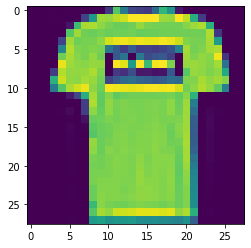

In [6]:

plt.imshow(train[1])

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train[2].shape

(28, 28)

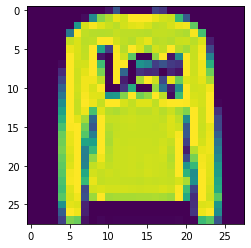

In [9]:
plt.imshow(test[1])

In [10]:
train = train.reshape(-1,28,28,1)/255

test = test.reshape([-1,28,28,1])/255

In [11]:


train.shape,test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:

train[2].shape

(28, 28, 1)

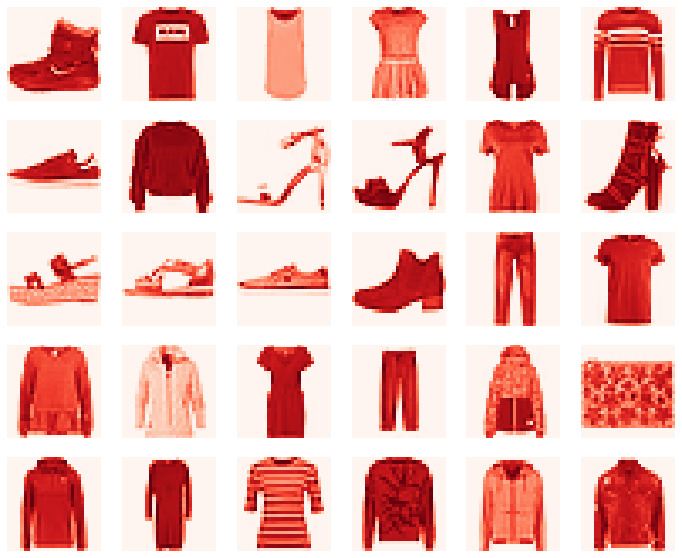

In [13]:
rows = 5 
cols = 6 
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) 
    plt.imshow(train[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_original.png")

In [14]:

inputs = Input(shape=(28,28,1))
x = Conv2D(128, (3), activation='relu', padding='same')(inputs)  #(3,3) can be written as 3
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
encoded = Conv2D(4, 3, activation='relu', padding='same')(x)

In [15]:
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [16]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', 
loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                             

In [17]:
epochs = 20
batch_size=256

history=autoencoder.fit(train,train,epochs=epochs,batch_size=batch_size,shuffle=True,validation_data=(test,test))

Epoch 1/20
235/235 [==============================] - 46s 130ms/step - loss: 0.3846 - val_loss: 0.3217
Epoch 2/20
235/235 [==============================] - 29s 125ms/step - loss: 0.3200 - val_loss: 0.3139
Epoch 3/20
235/235 [==============================] - 29s 125ms/step - loss: 0.3105 - val_loss: 0.3066
Epoch 4/20
235/235 [==============================] - 29s 125ms/step - loss: 0.3047 - val_loss: 0.2987
Epoch 5/20
235/235 [==============================] - 29s 125ms/step - loss: 0.3007 - val_loss: 0.2927
Epoch 6/20
235/235 [==============================] - 29s 125ms/step - loss: 0.2974 - val_loss: 0.2926
Epoch 7/20
235/235 [==============================] - 29s 125ms/step - loss: 0.2949 - val_loss: 0.2880
Epoch 8/20
235/235 [==============================] - 29s 125ms/step - loss: 0.2930 - val_loss: 0.2831
Epoch 9/20
235/235 [==============================] - 29s 125ms/step - loss: 0.2914 - val_loss: 0.2832
Epoch 10/20
235/235 [==============================] - 29s 125ms/step - l

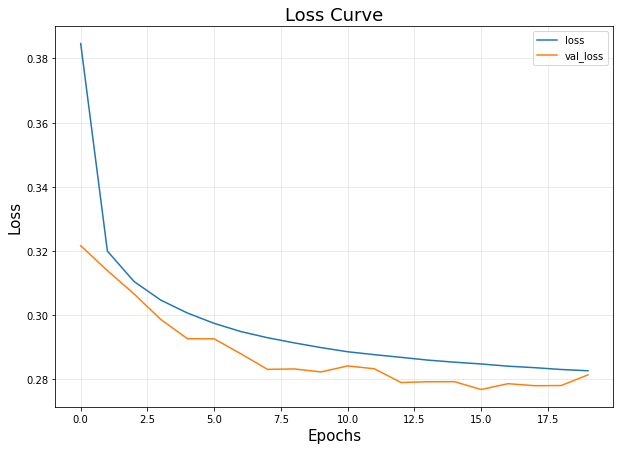

In [18]:
f = plt.figure(figsize=(10,7))
f.add_subplot()


plt.plot(history.epoch, history.history['loss'], label = "loss") 
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

In [27]:
autoencoder.save("/content/drive/MyDrive/mtech_course_projects/ipc_project(autoencoder)/autoencoder_fashionmnist")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/mtech_course_projects/ipc_project(autoencoder)/autoencoder_fashionmnist/assets


In [28]:
from tensorflow import keras
keras.models.load_model('/content/drive/MyDrive/mtech_course_projects/ipc_project(autoencoder)/autoencoder_fashionmnist')
# autoencoder.encoder.summary()
# autoencoder.decoder.summary()

In [29]:
test_result = autoencoder.predict(test)


In [30]:
test_result.nbytes

31360000

In [31]:
test.nbytes

62720000

In [32]:
compression_ratio=(test.nbytes)/(test_result.nbytes)
compression_ratio

2.0

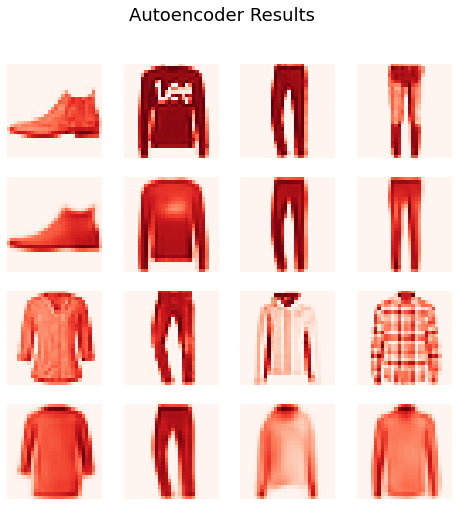

In [33]:
rows = 2 
cols = 4 

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) 
        plt.imshow(test[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) 
        plt.imshow(test_result[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")
plt.show()

In [34]:
# Calculation of median
def med(arr):
    arr_sort = np.sort(arr)
    median = arr_sort[len(arr)//2]
    return median






In [35]:
img1=test[1].reshape([28,28])
img2=test_result[1].reshape([28,28])

(<matplotlib.image.AxesImage at 0x7fec542a0510>, (28, 28))

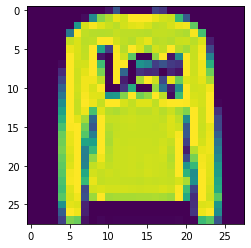

In [36]:
plt.imshow(img1),img1.shape

(<matplotlib.image.AxesImage at 0x7fec53e68e10>, 784)

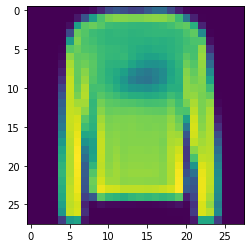

In [37]:
plt.imshow(img2),img2.size

In [38]:
np.size(img2)

784

In [39]:
def psnr(img1, img2):
    img1 = np.array(img1)
    img2 = np.array(img2)
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    mse = np.mean((img1 - img2) ** 2) 
    if(mse == 0):
        return 100
    else :
        max_pixel = 1.0 
        psnr = 10 * np.log10(max_pixel /mse) 
    return psnr,mse

# computing psnr(dB)
psnr,mse=psnr(img1,img2)
print("PSNR for given image is equal to")
print(psnr) 
print("\n")
print("Mean Square Loss is equal to")
print(mse)

PSNR for given image is equal to
62.72512041830436


Mean Square Loss is equal to
5.339344687867737e-07
